<HTML>
    <H1>
        <center><b>Public & Social Health Determinants<b></center>
        <center>Promotional Demo 2023</center>
    </H1>
</HTML>

## Environment

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data 

In [46]:
df = pd.read_csv("national_survey.csv")
# state_data1 = pd.read_csv("state_data1.csv")
# state_data2 = pd.read_csv("state_data2.csv")

In [47]:
# Sample cleaning (e.g., handle missing values)
df.dropna(inplace=True)
# state_data1.fillna(0, inplace=True)
# state_data2.fillna(method='bfill', inplace=True)

# Merging datasets (based on some common key like 'state_id' or 'county_id')
# merged_data = national_survey.merge(state_data1, on="state_id").merge(state_data2, on="state_id")
df.describe()

,State_ID,County ID,Value
count,20000.000000,20000.00000,20000.000000
mean,25.646750,31.57205,254.595650
std,14.466984,17.85369,141.484499
min,1.000000,1.00000,10.000000
25%,13.000000,16.00000,132.000000
50%,26.000000,32.00000,254.000000
75%,38.000000,47.00000,376.000000
max,50.000000,62.00000,500.000000


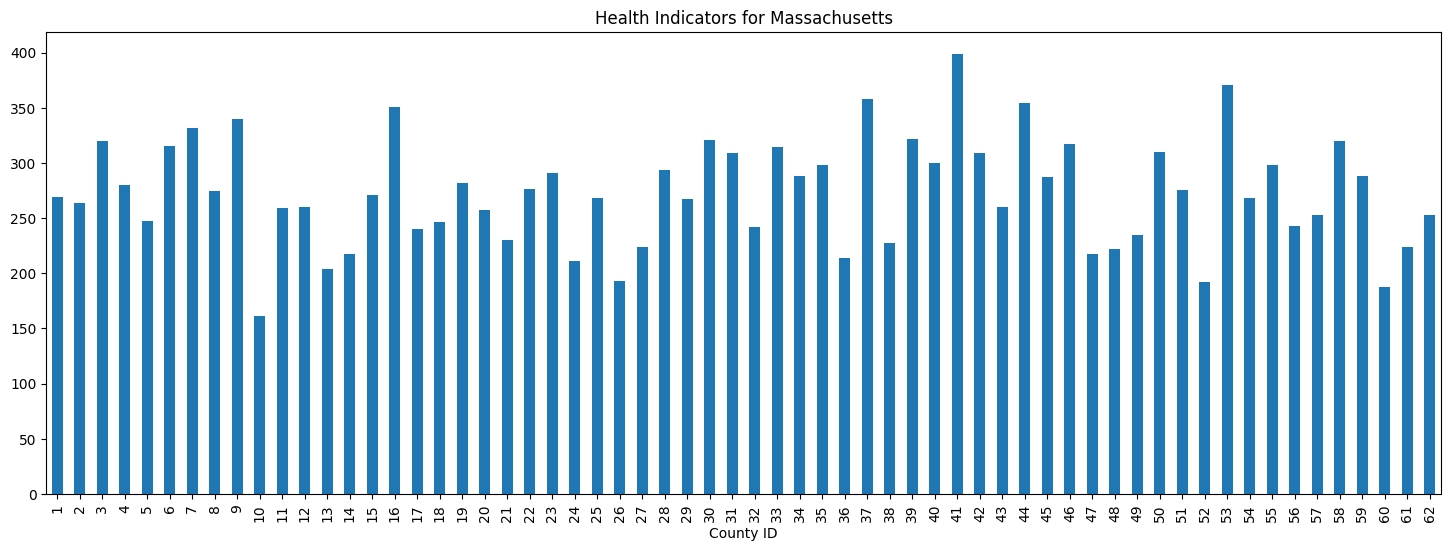

In [67]:
state_to_view = 'Massachusetts'
state_data = df[df['State'] == state_to_view]
county_averages = state_data.groupby('County ID')['Value'].mean()
county_averages.plot(x=3, y=9, kind='bar', title=f'Health Indicators for {state_to_view}', figsize=(18, 6))
plt.show()

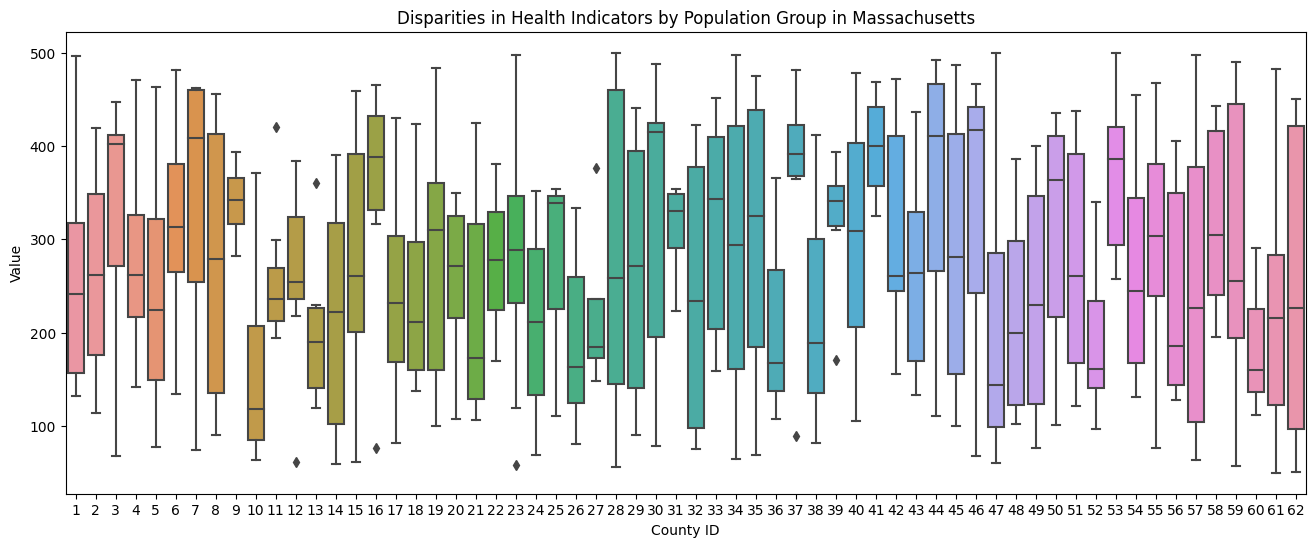

In [70]:
plt.figure(figsize=(16,6))
sns.boxplot(x='County ID', y='Value', data=state_data)
plt.title(f'Disparities in Health Indicators by Population Group in {state_to_view}')
plt.show()


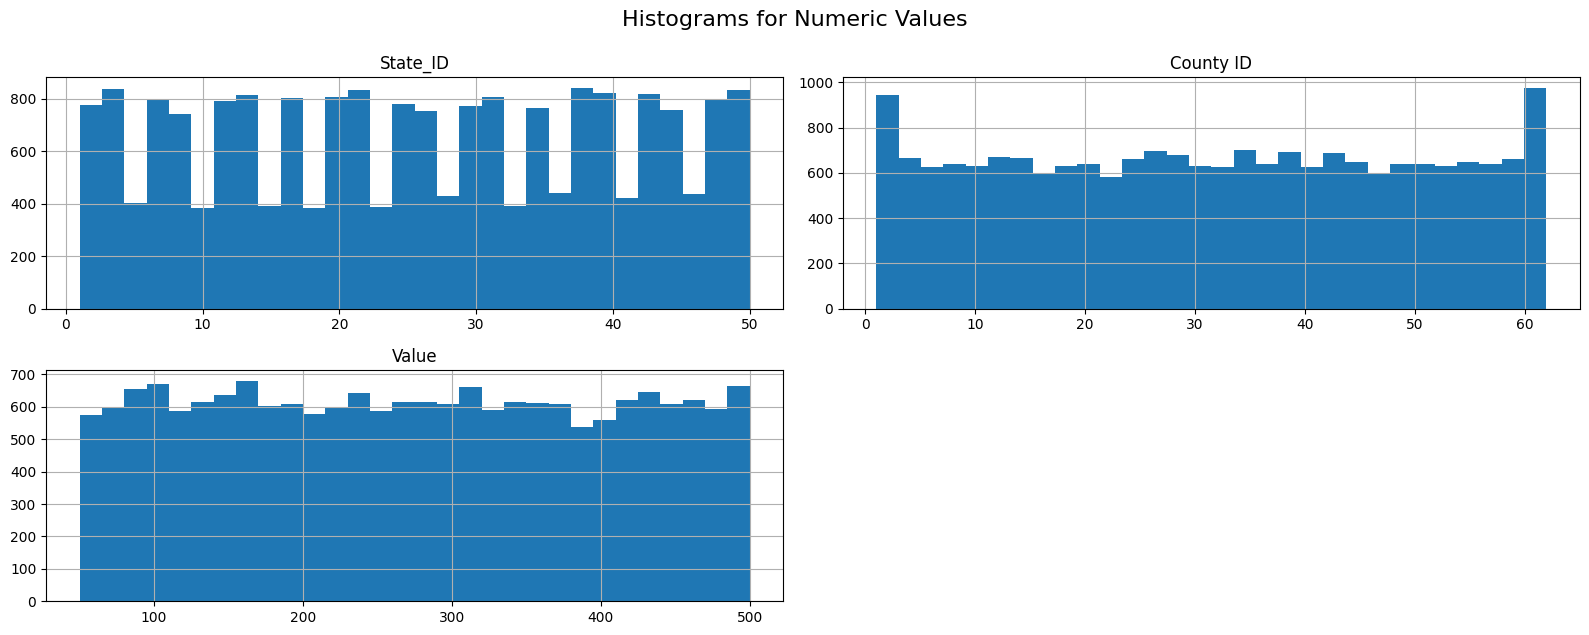

In [69]:
# Visual 1 Hisogram
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].hist(figsize=(16, 6), bins=30)
plt.tight_layout()
plt.suptitle('Histograms for Numeric Values', y=1.05, fontsize=16)
plt.show()

In [52]:
# Assume value < 50 is sensitive and needs to be suppressed.
df['Value'] = df['Value'].apply(lambda x: np.nan if x < 50 else x)

<br>
<hr>
<center><h2>🔽Final Output to Send to Tableau🔽</h2></center>

In [53]:
df.to_csv("processed_data.csv", index=False)